/Users/saumikdana/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


https://finance.yahoo.com/calendar/earnings/?day=2024-06-25


/Users/saumikdana/Stock_Selector/scripts/scrape_url.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
/Users/saumikdana/Stock_Selector/scripts/scrape_url.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
/Users/saumikdana/Stock_Selector/scripts/scrape_url.py:58: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ticker_data = pd.concat(ticker_data_list, ignore_index=True)


Options data for BIDU:
Average IV for Calls: 0.4342843420943872
Average IV for Puts: 0.43153451171317614
Total Call Volume: 18313.0
Total Call open interest: 112195
Total Call engagement: 130508.0
Total Put Volume: 7552.0
Total Put open interest: 100887
Total Put engagement: 108439.0
Number of ITM Call Options: 77
Number of ITM Put Options: 134
Number of OTM Call Options: 146
Number of OTM Put Options: 85


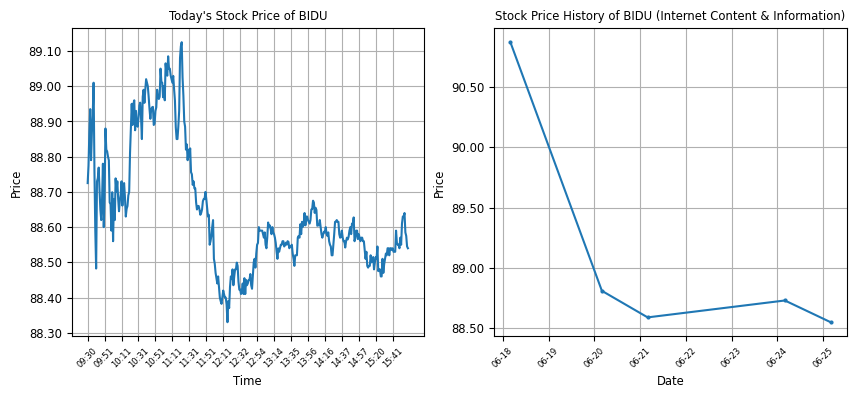

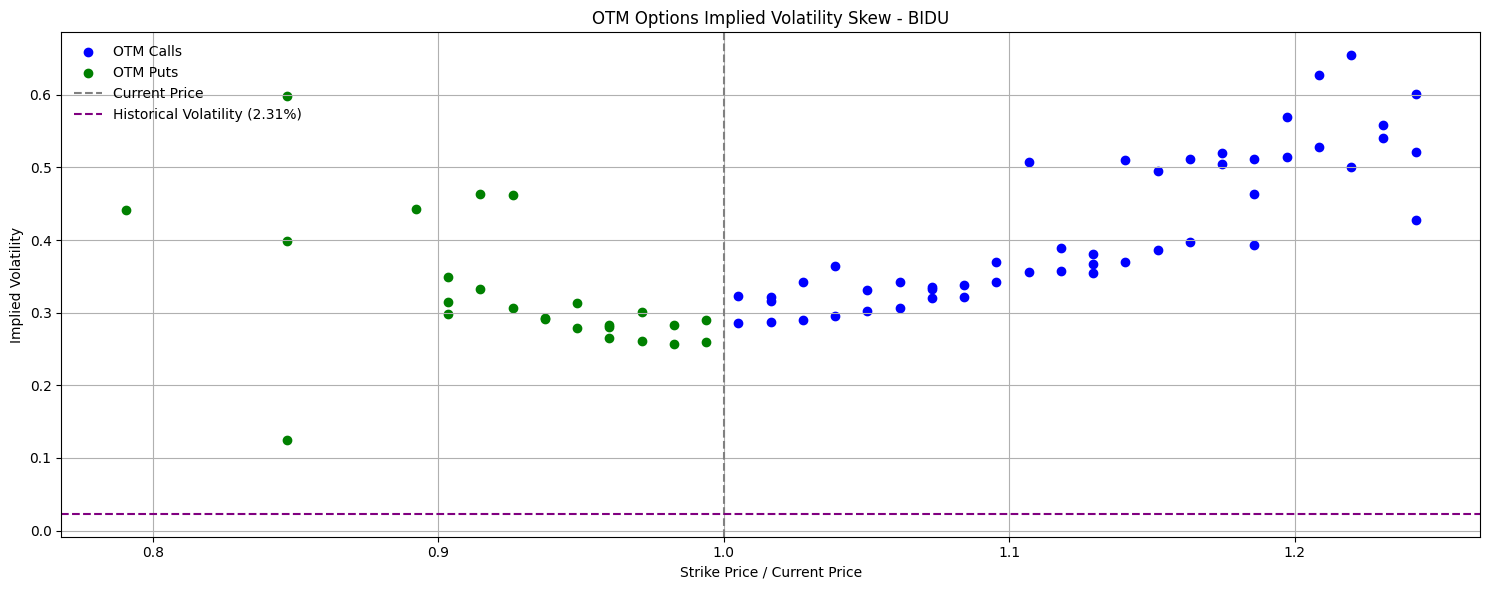

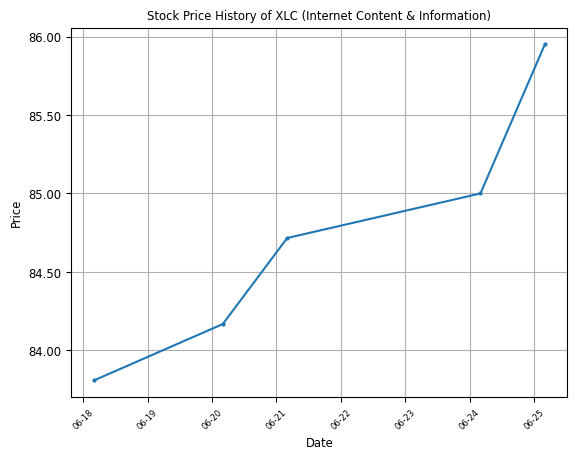

Options data for KMX:
Average IV for Calls: 0.42566686070033477
Average IV for Puts: 0.3476084145450592
Total Call Volume: 6921.0
Total Call open interest: 36248
Total Call engagement: 43169.0
Total Put Volume: 1605.0
Total Put open interest: 30216
Total Put engagement: 31821.0
Number of ITM Call Options: 30
Number of ITM Put Options: 32
Number of OTM Call Options: 33
Number of OTM Put Options: 32


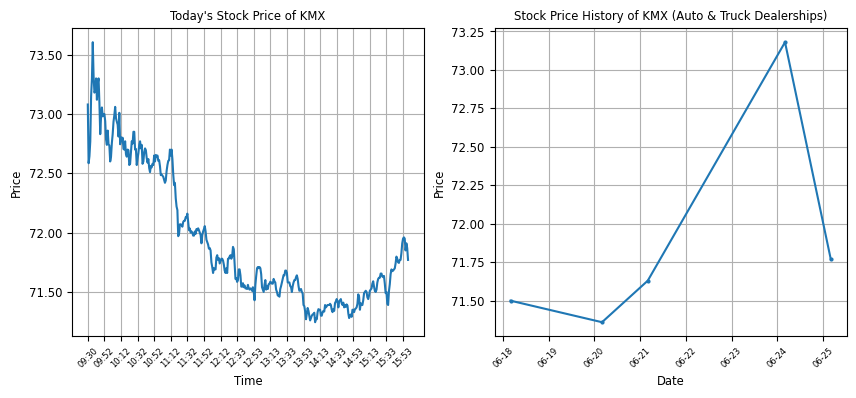

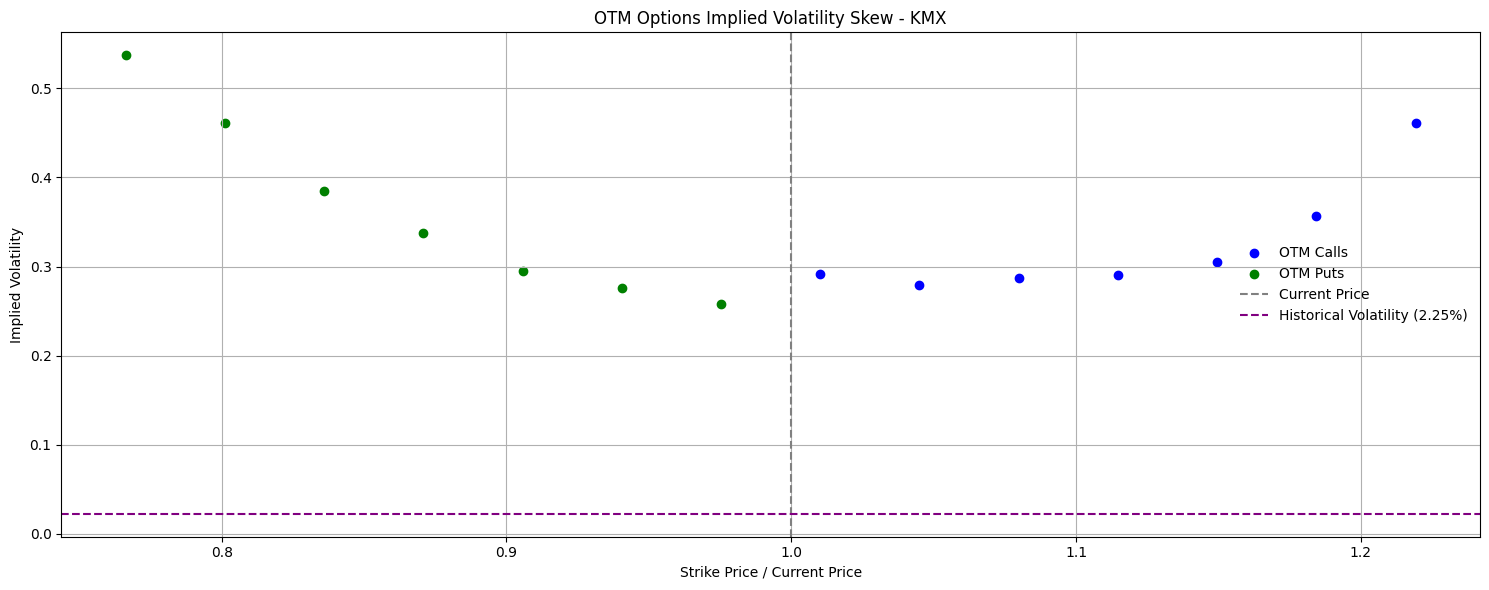

Options data for AXNX:
Average IV for Calls: 0.3643191010131837
Average IV for Puts: 0.3779053909301757
Total Call Volume: 225.0
Total Call open interest: 3084
Total Call engagement: 3309.0
Total Put Volume: 568.0
Total Put open interest: 2590
Total Put engagement: 3158.0
Number of ITM Call Options: 12
Number of ITM Put Options: 4
Number of OTM Call Options: 8
Number of OTM Put Options: 14


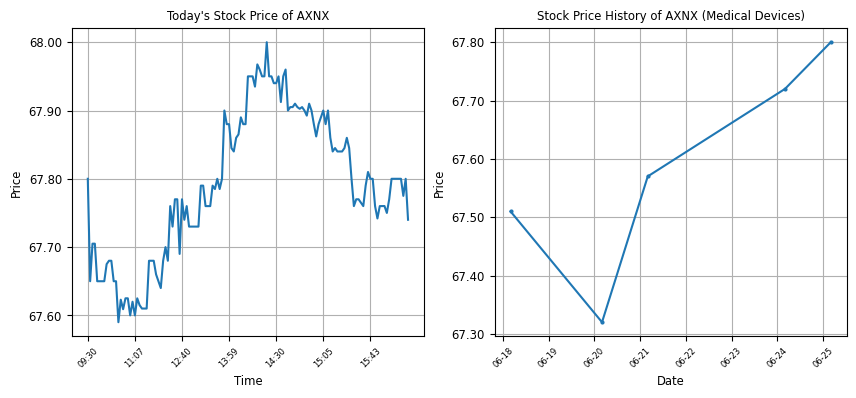

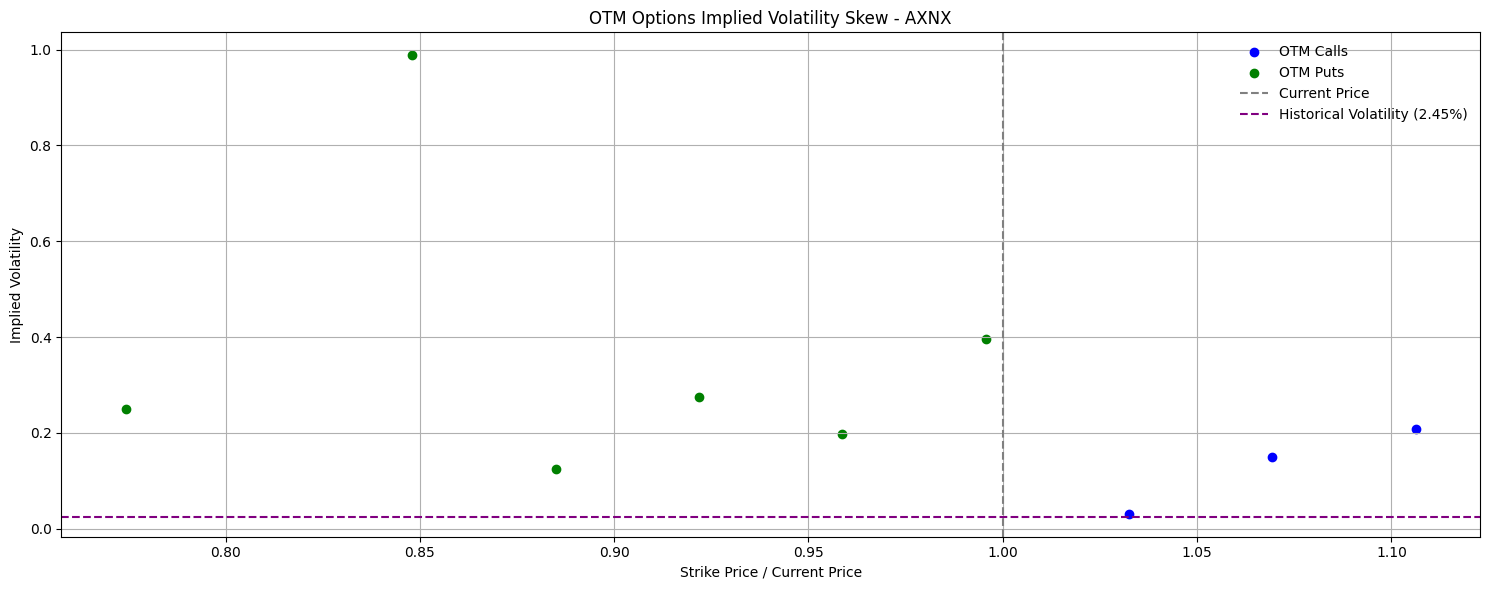

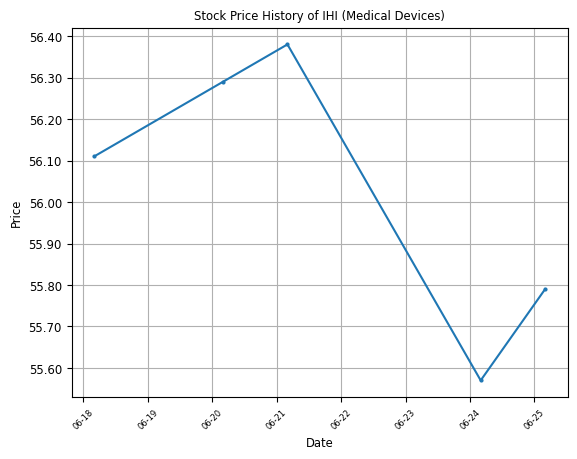

Options data for SCVL:
Average IV for Calls: 0.44108631835937506
Average IV for Puts: 0.6430292858886718
Total Call Volume: 11.0
Total Call open interest: 1358
Total Call engagement: 1369.0
Total Put Volume: 17.0
Total Put open interest: 44
Total Put engagement: 61.0
Number of ITM Call Options: 4
Number of ITM Put Options: 0
Number of OTM Call Options: 5
Number of OTM Put Options: 6


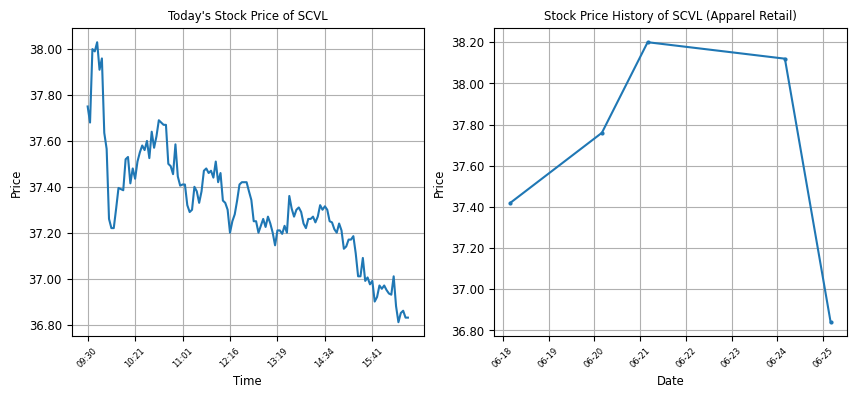

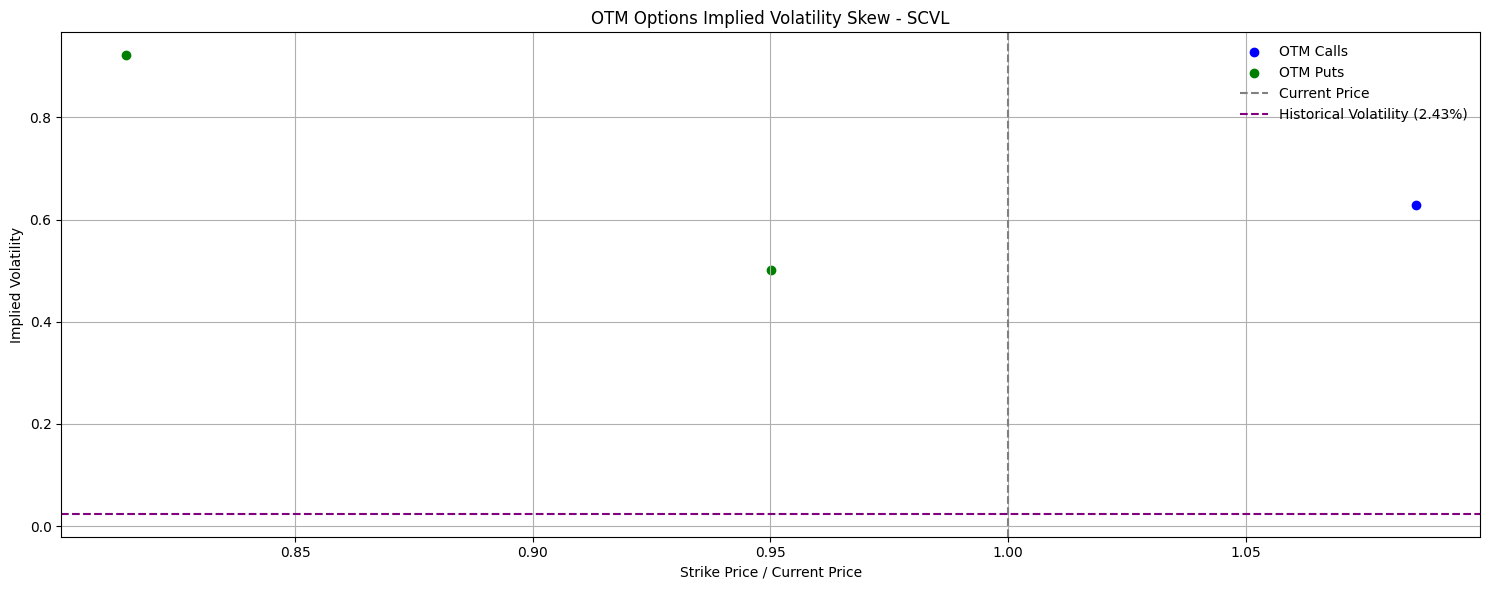

Options data for ATEX:
Average IV for Calls: 0.9262702685546875
Average IV for Puts: 0.6109658044433595
Total Call Volume: 5.0
Total Call open interest: 6.0
Total Call engagement: 11.0
Total Put Volume: 107.0
Total Put open interest: 334
Total Put engagement: 441.0
Number of ITM Call Options: 0
Number of ITM Put Options: 1
Number of OTM Call Options: 1
Number of OTM Put Options: 3


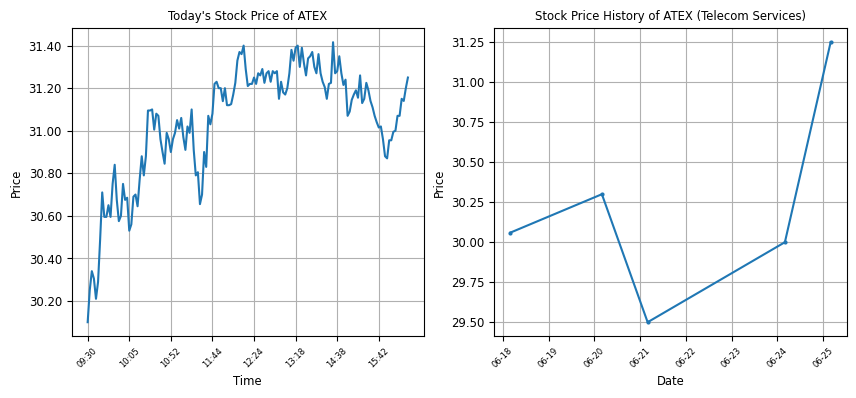

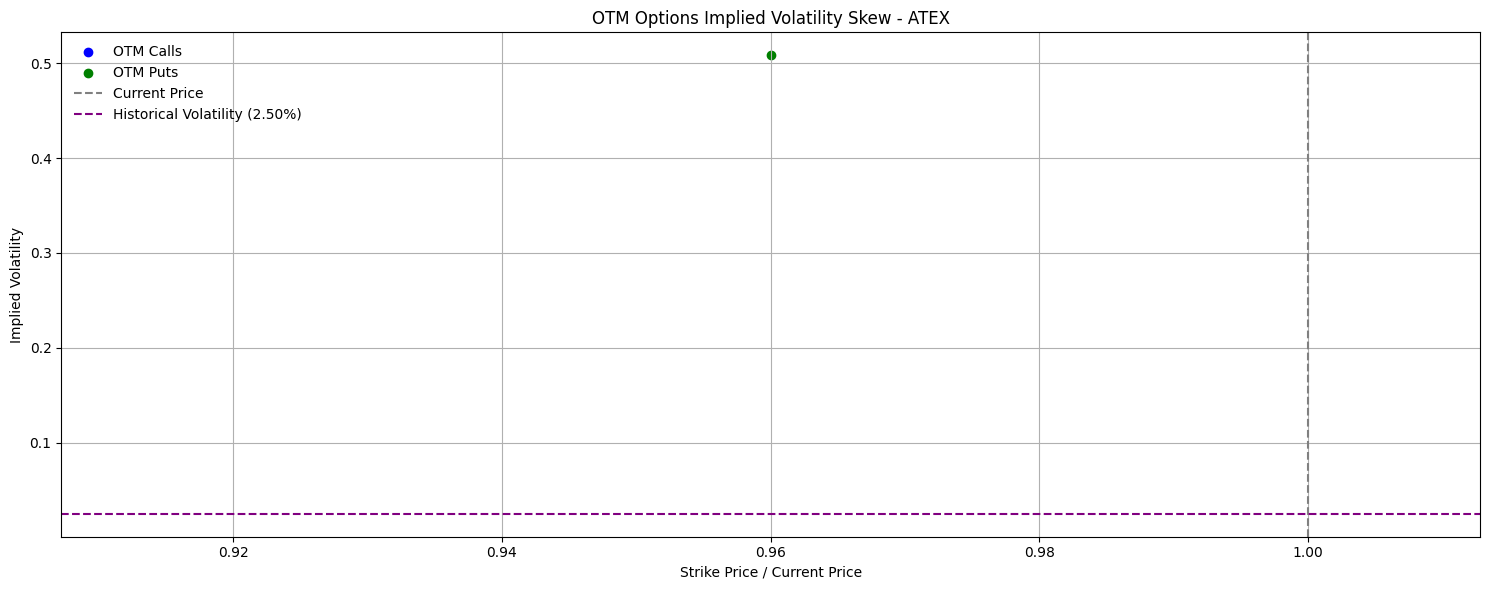

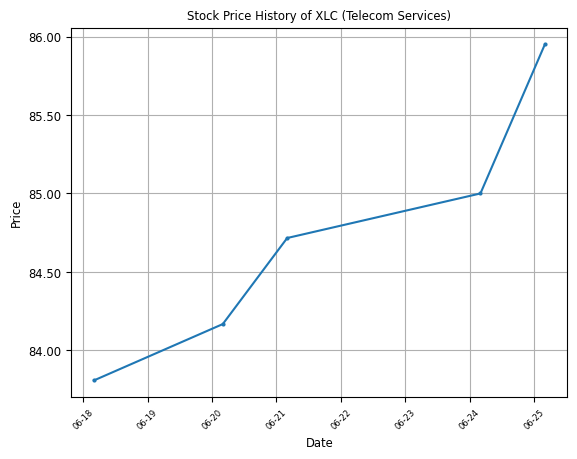

Options data for AVNW:
Average IV for Calls: 0.5774883560180665
Average IV for Puts: 0.4680635876464844
Total Call Volume: 511.0
Total Call open interest: 1165
Total Call engagement: 1676.0
Total Put Volume: 26.0
Total Put open interest: 650.0
Total Put engagement: 676.0
Number of ITM Call Options: 2
Number of ITM Put Options: 4
Number of OTM Call Options: 6
Number of OTM Put Options: 2


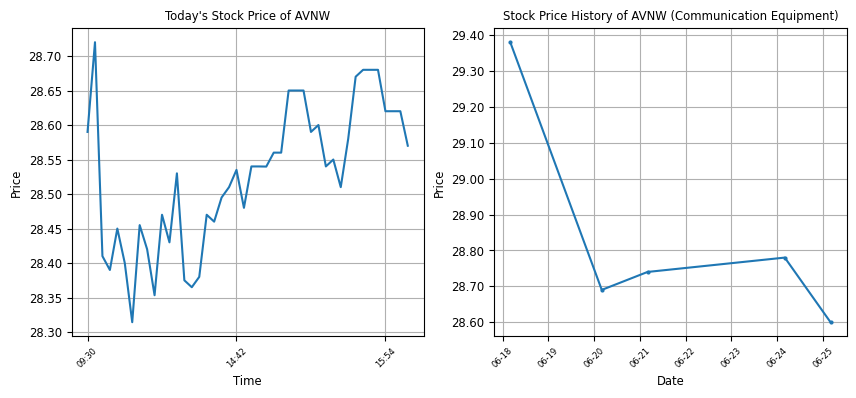

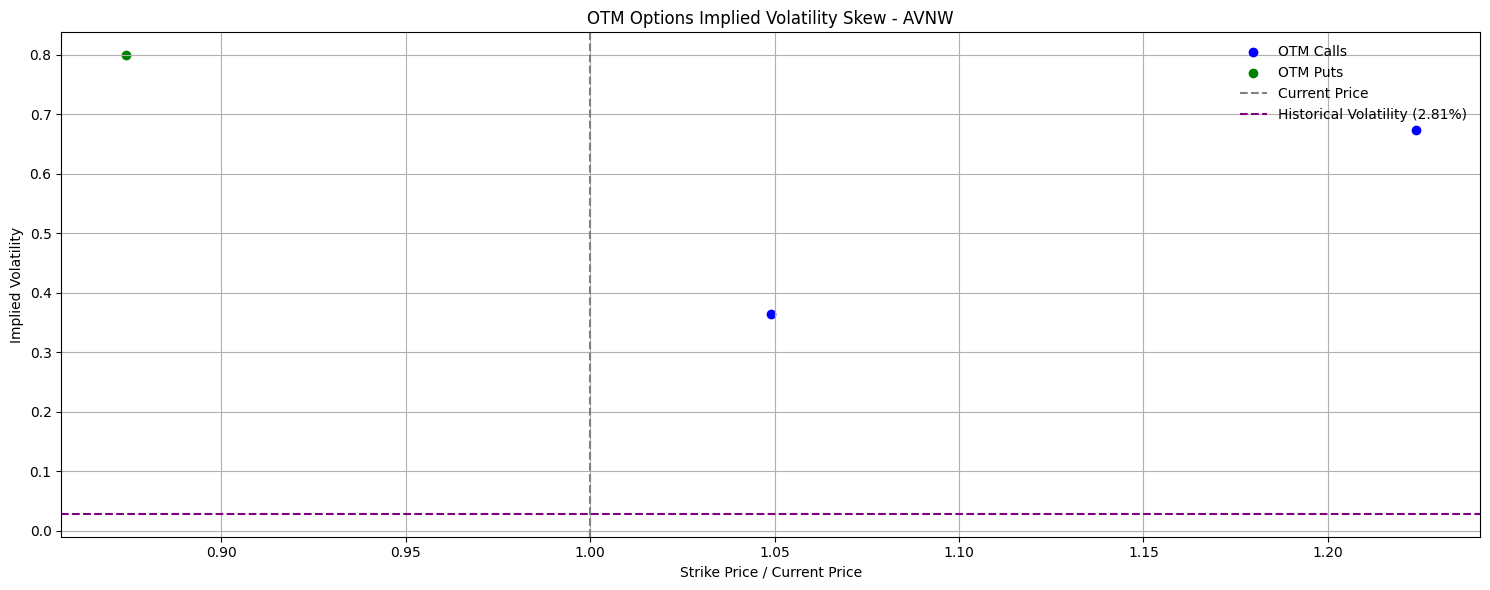

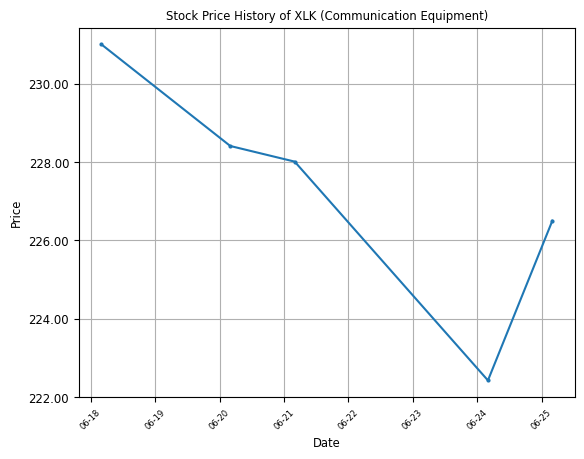

Options data for CECO:
Average IV for Calls: 0.6933628769531252
Average IV for Puts: 0.645294345703125
Total Call Volume: 99.0
Total Call open interest: 828
Total Call engagement: 927.0
Total Put Volume: 49.0
Total Put open interest: 59.0
Total Put engagement: 108.0
Number of ITM Call Options: 11
Number of ITM Put Options: 0
Number of OTM Call Options: 4
Number of OTM Put Options: 9


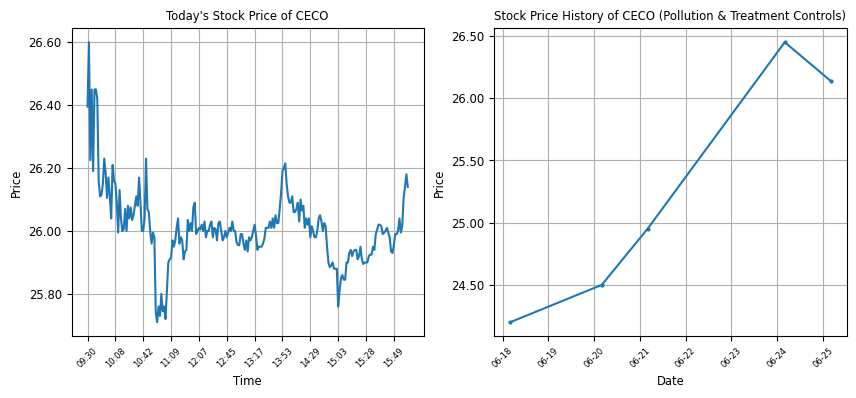

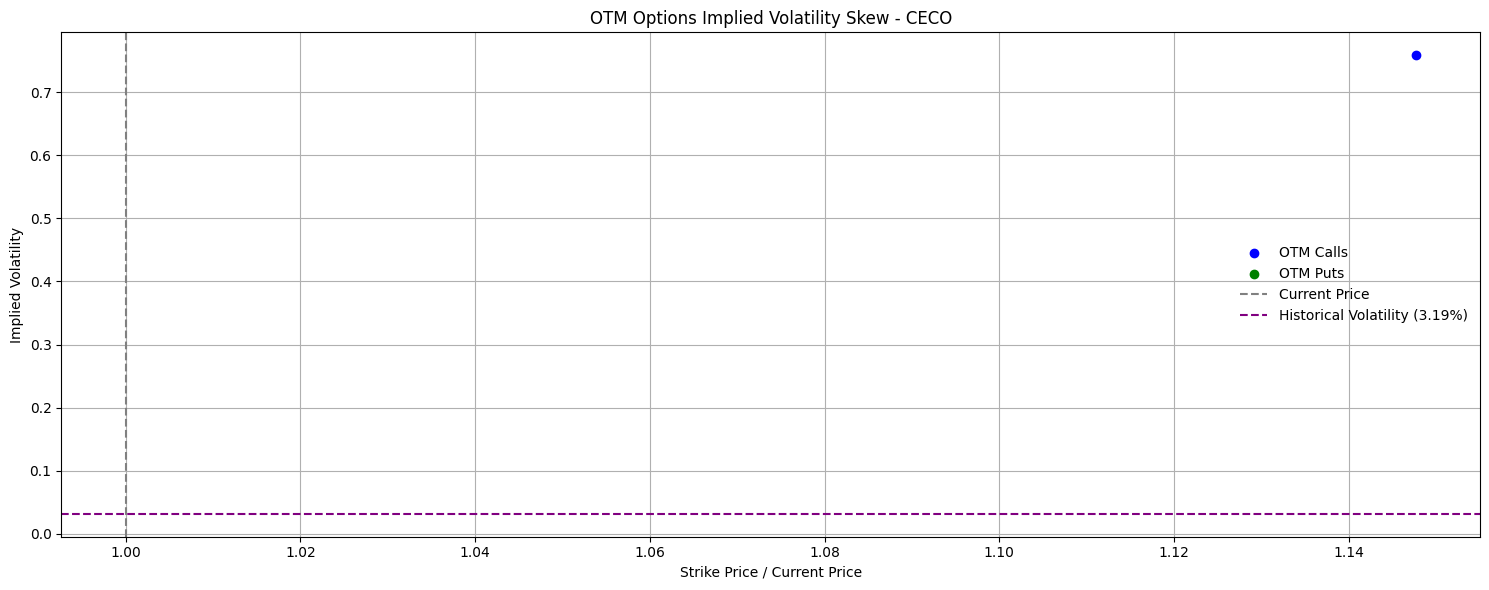

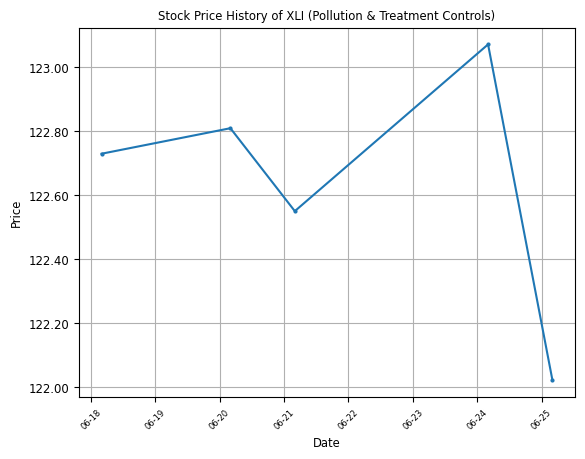

Options data for BVN:
Average IV for Calls: 0.6058858522385816
Average IV for Puts: 0.7653295315212674
Total Call Volume: 164.0
Total Call open interest: 990
Total Call engagement: 1154.0
Total Put Volume: 16.0
Total Put open interest: 243.0
Total Put engagement: 259.0
Number of ITM Call Options: 11
Number of ITM Put Options: 4
Number of OTM Call Options: 15
Number of OTM Put Options: 5


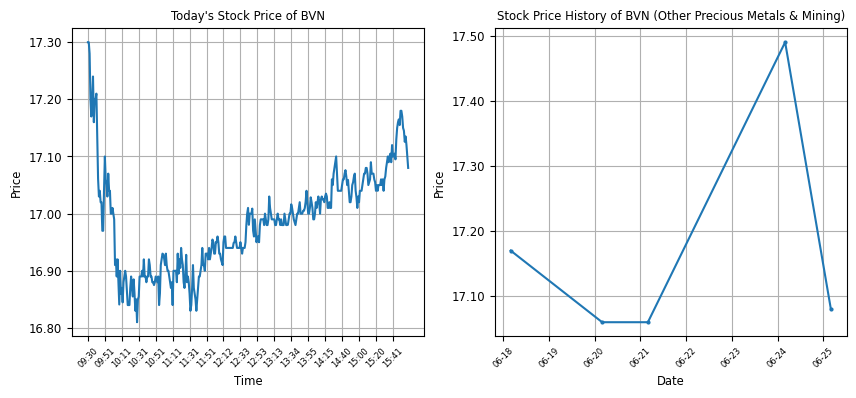

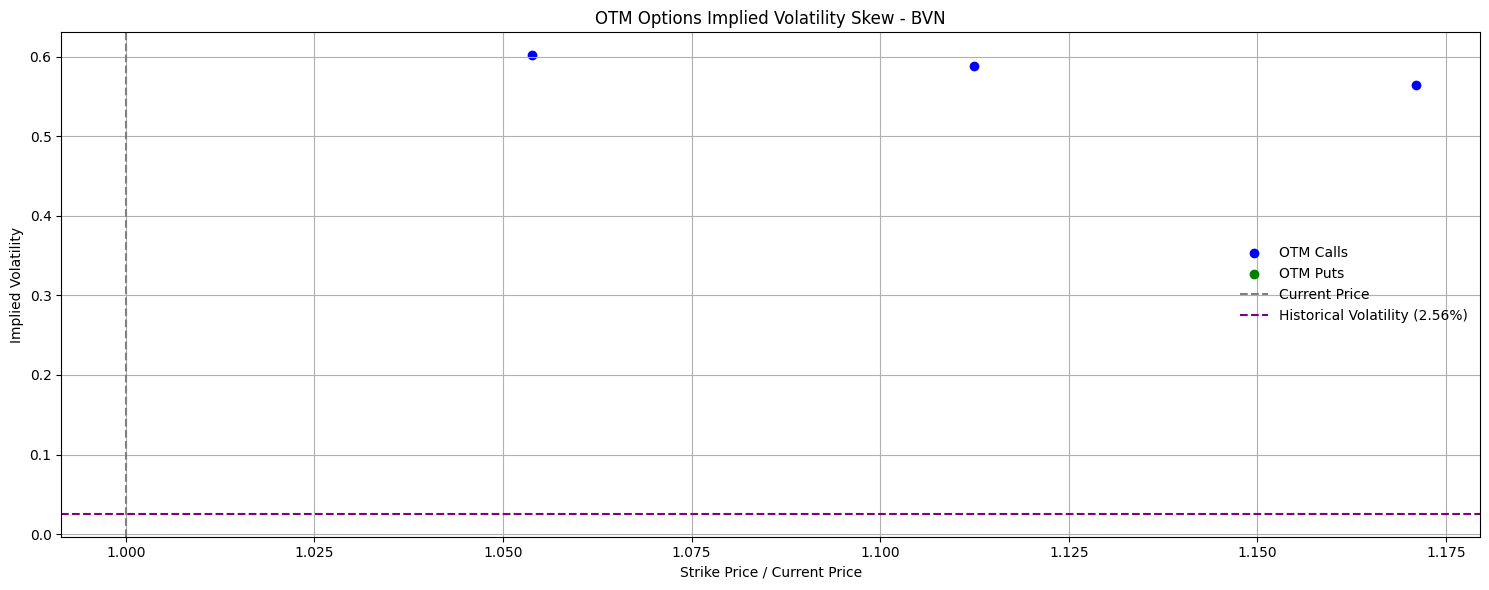

Options data for CPRX:
Average IV for Calls: 0.5360764166259766
Average IV for Puts: 0.6339018896484375
Total Call Volume: 215.0
Total Call open interest: 1288
Total Call engagement: 1503.0
Total Put Volume: 51
Total Put open interest: 595
Total Put engagement: 646
Number of ITM Call Options: 5
Number of ITM Put Options: 3
Number of OTM Call Options: 3
Number of OTM Put Options: 6


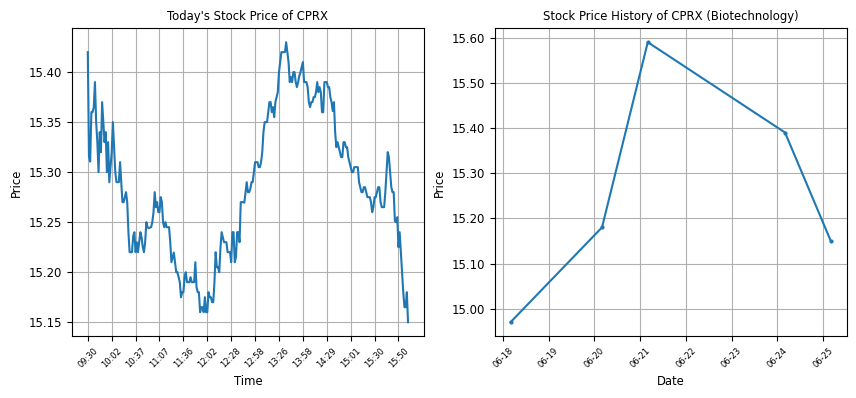

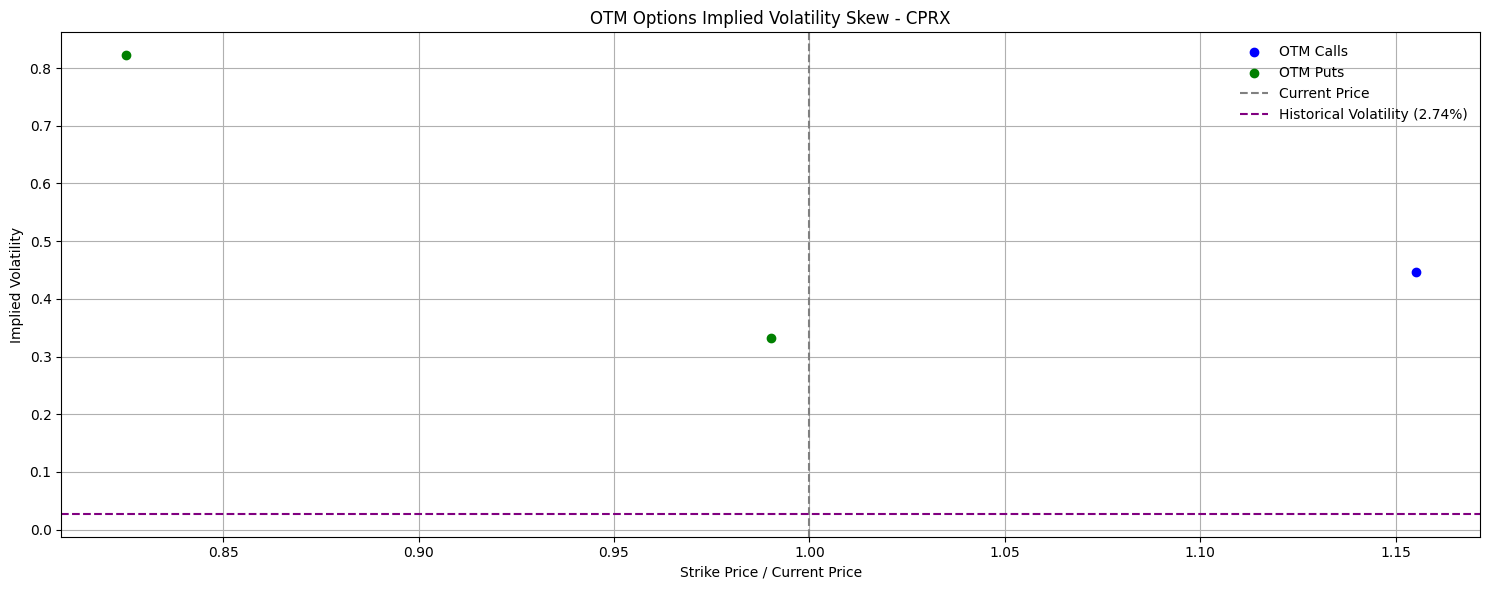

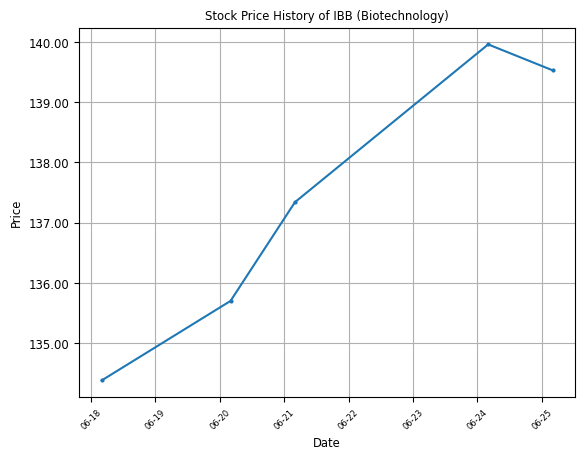

Options data for SIBN:
Average IV for Calls: 0.7282748901367189
Average IV for Puts: 0.4335994140625
Total Call Volume: 2515.0
Total Call open interest: 2558
Total Call engagement: 5073.0
Total Put Volume: 2585.0
Total Put open interest: 2504.0
Total Put engagement: 5089.0
Number of ITM Call Options: 2
Number of ITM Put Options: 3
Number of OTM Call Options: 6
Number of OTM Put Options: 1


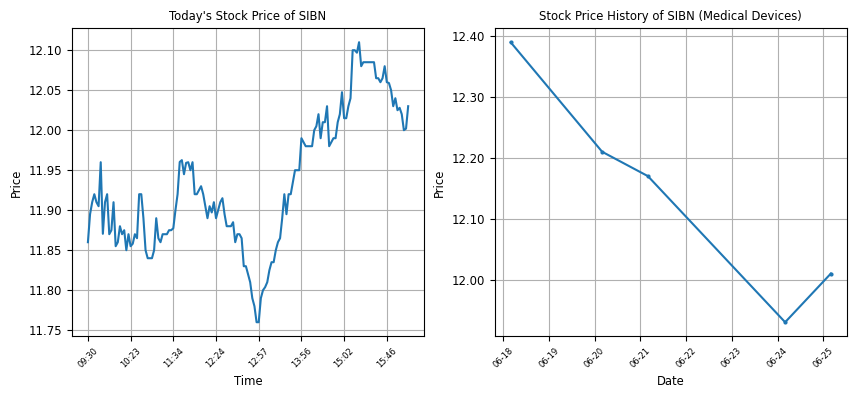

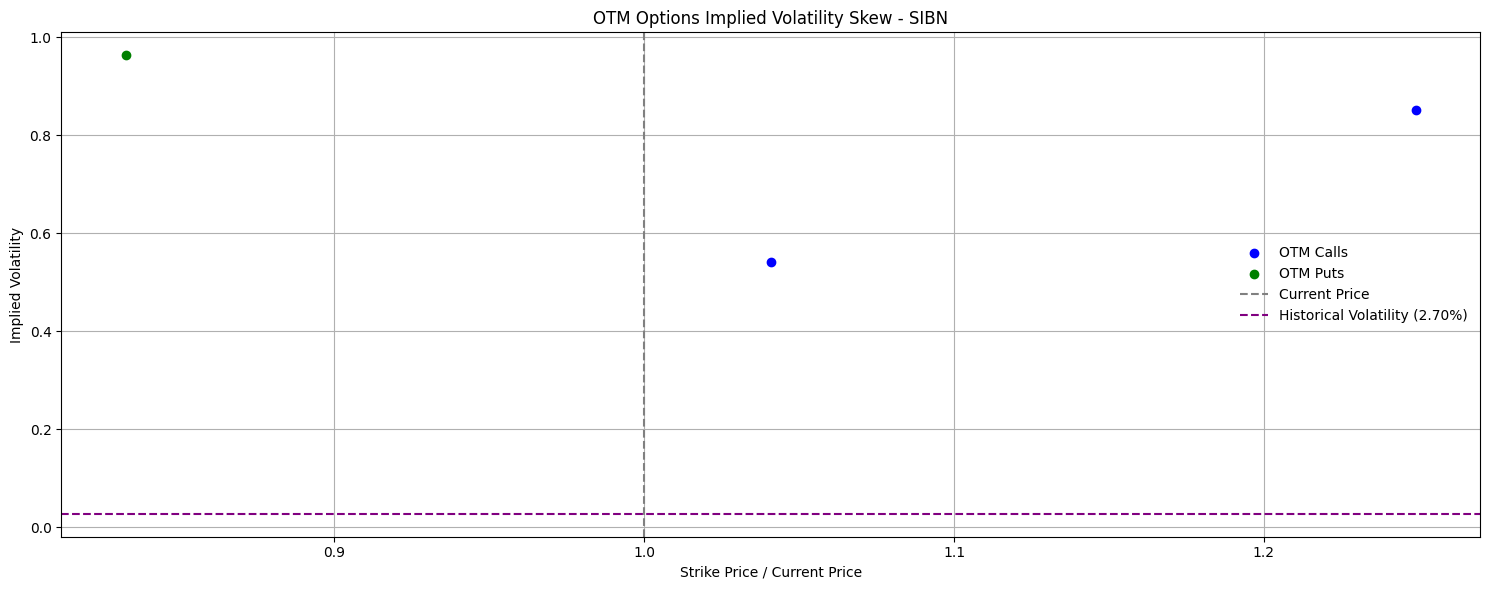

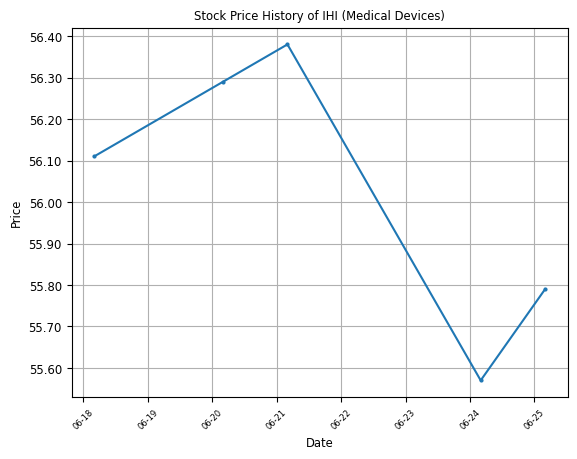

Options data for ASX:
Average IV for Calls: 0.4144171282087054
Average IV for Puts: 0.5433639414062499
Total Call Volume: 705.0
Total Call open interest: 6806
Total Call engagement: 7511.0
Total Put Volume: 24.0
Total Put open interest: 844.0
Total Put engagement: 868.0
Number of ITM Call Options: 3
Number of ITM Put Options: 2
Number of OTM Call Options: 4
Number of OTM Put Options: 3


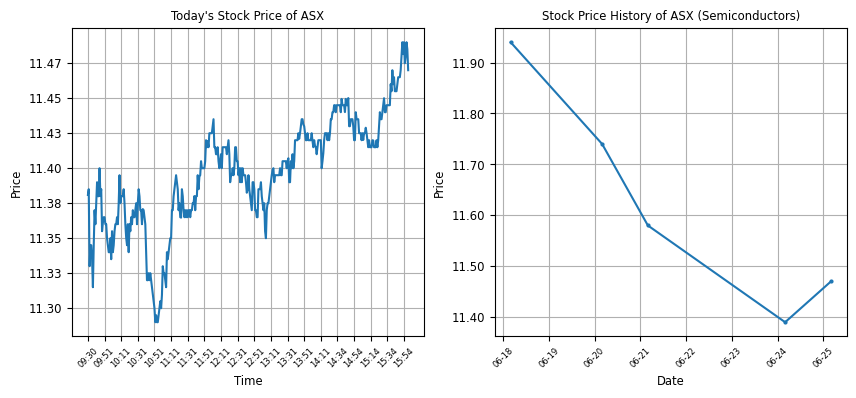

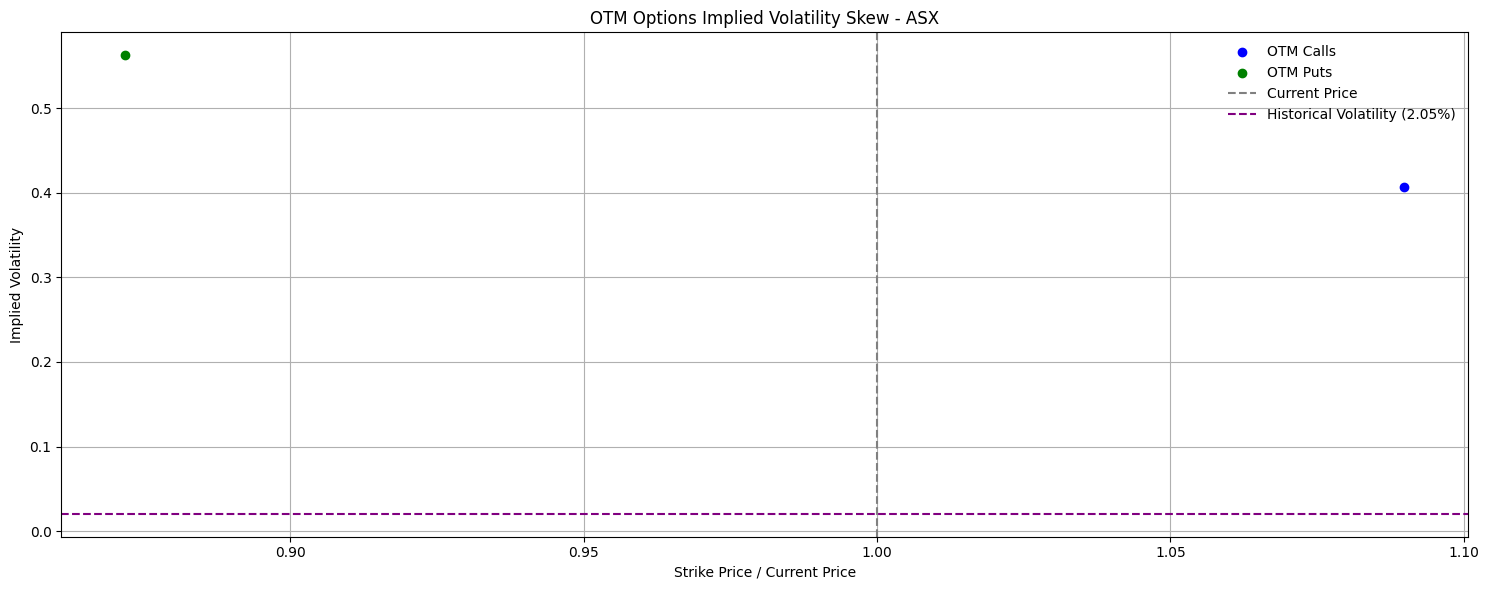

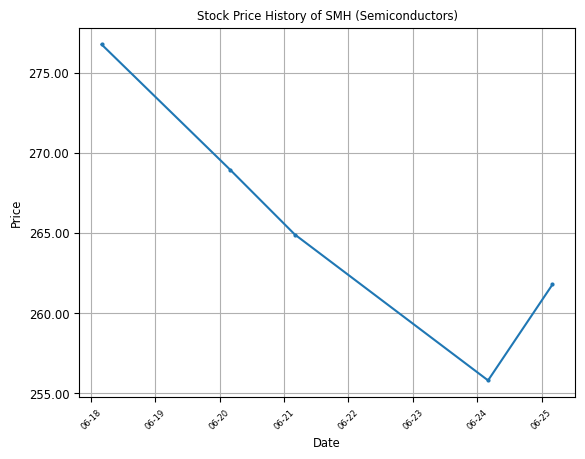

Options data for BBVA:
Average IV for Calls: 0.8234437109374999
Average IV for Puts: 0.350592431640625
Total Call Volume: 7.0
Total Call open interest: 465
Total Call engagement: 472.0
Total Put Volume: 13.0
Total Put open interest: 1619.0
Total Put engagement: 1632.0
Number of ITM Call Options: 2
Number of ITM Put Options: 2
Number of OTM Call Options: 3
Number of OTM Put Options: 2


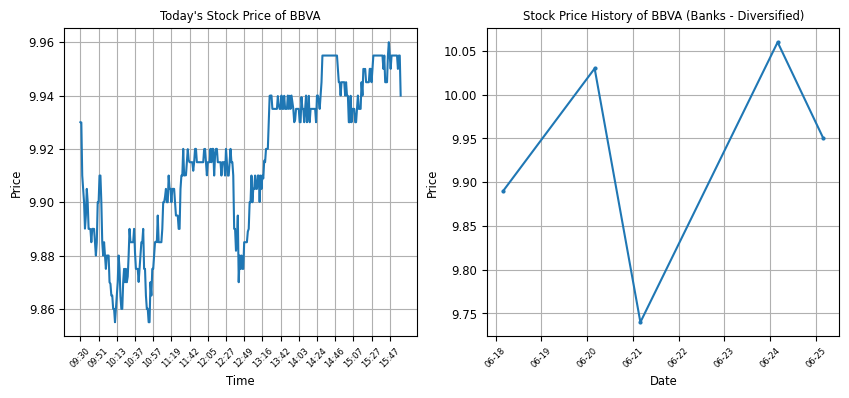

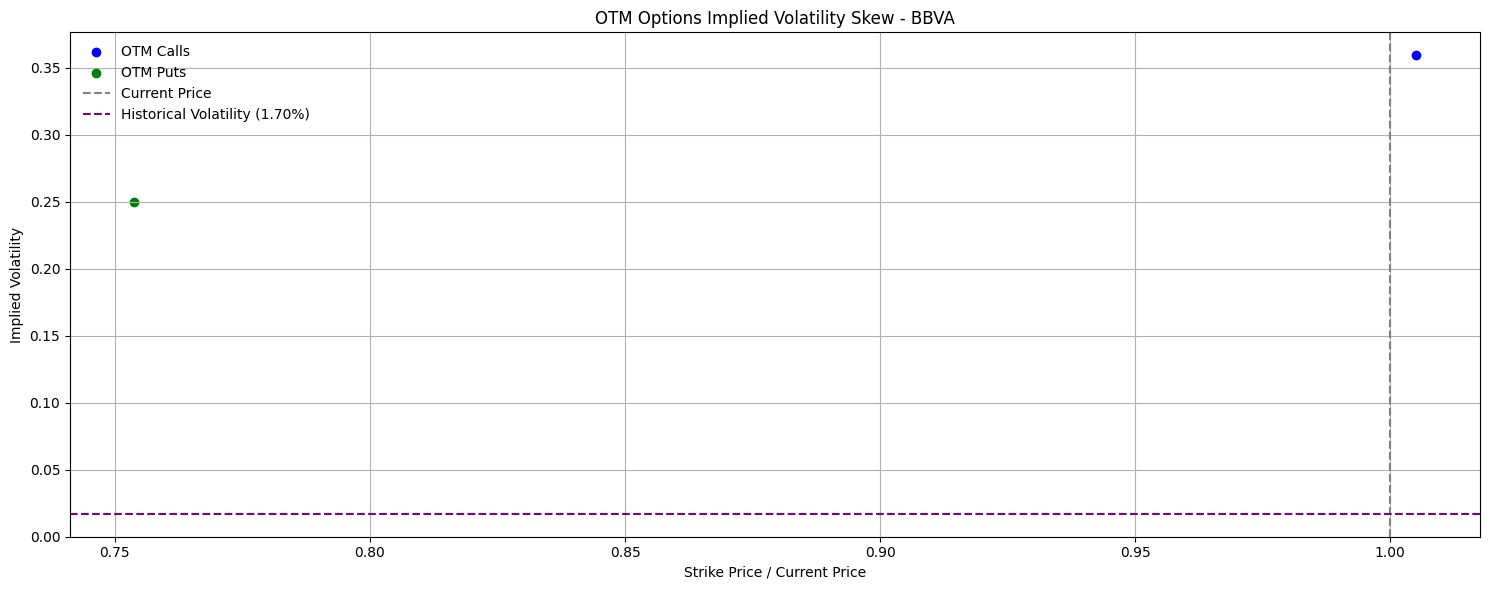

Options data for ASUR:
Average IV for Calls: 0.7451197363281251
Average IV for Puts: 0.72070591796875
Total Call Volume: 4.0
Total Call open interest: 382
Total Call engagement: 386.0
Total Put Volume: 25.0
Total Put open interest: 166
Total Put engagement: 191.0
Number of ITM Call Options: 3
Number of ITM Put Options: 0
Number of OTM Call Options: 0
Number of OTM Put Options: 2


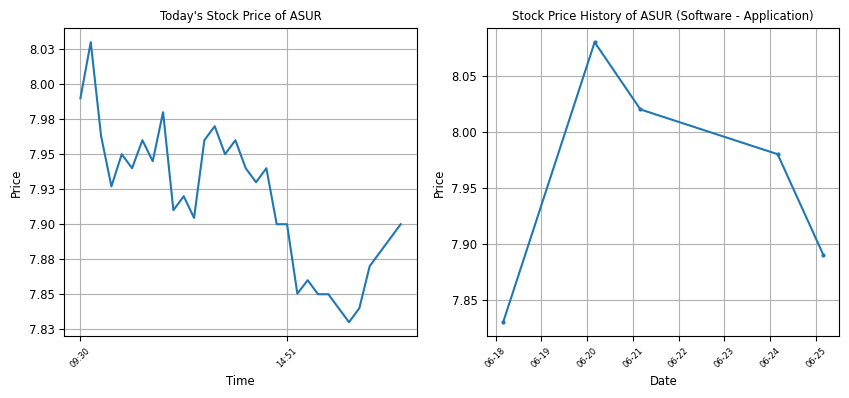

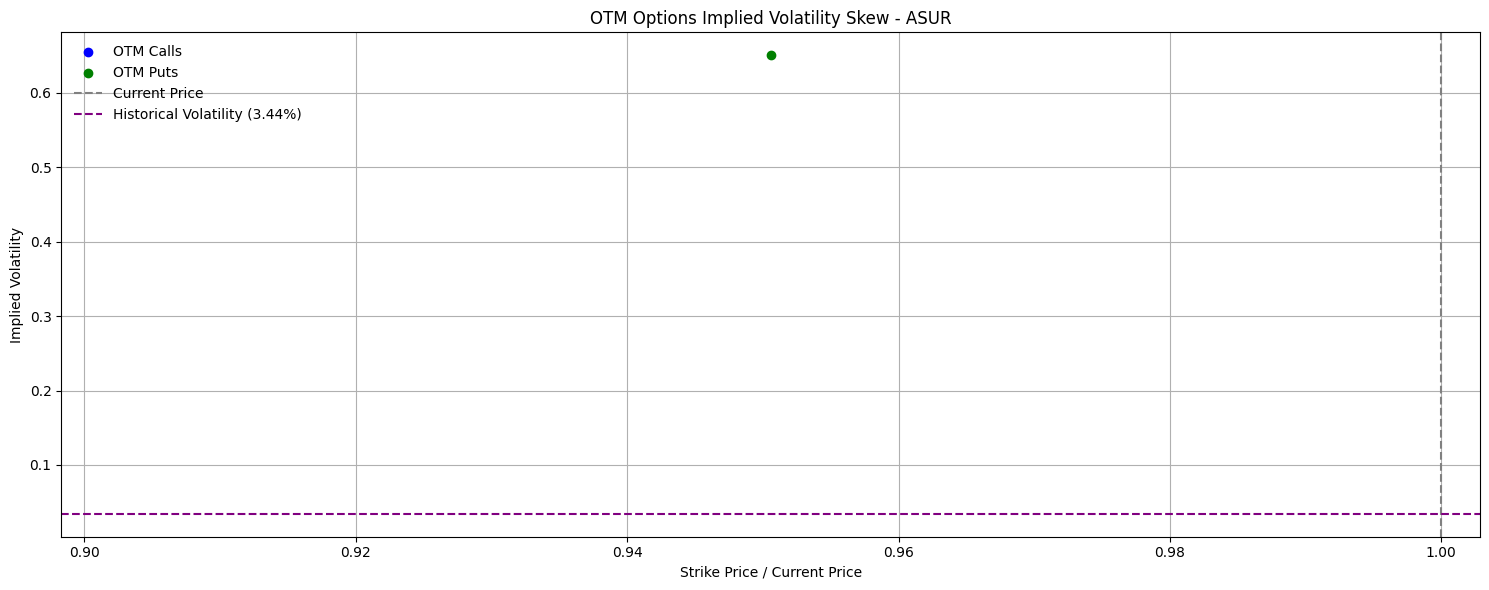

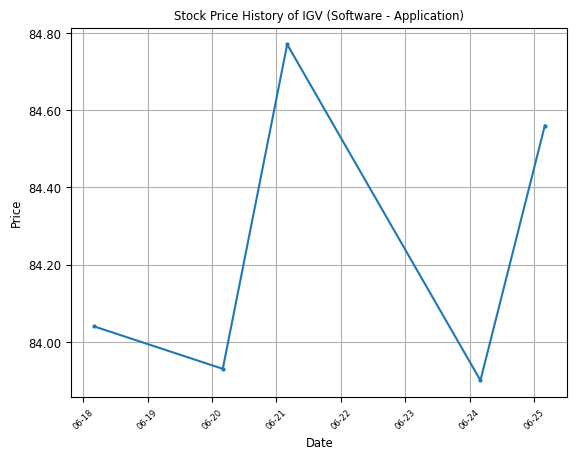

Options data for CDMO:
Average IV for Calls: 0.7626976855468751
Average IV for Puts: 0.7924825439453125
Total Call Volume: 23.0
Total Call open interest: 1749
Total Call engagement: 1772.0
Total Put Volume: 342.0
Total Put open interest: 1052.0
Total Put engagement: 1394.0
Number of ITM Call Options: 0
Number of ITM Put Options: 4
Number of OTM Call Options: 5
Number of OTM Put Options: 0


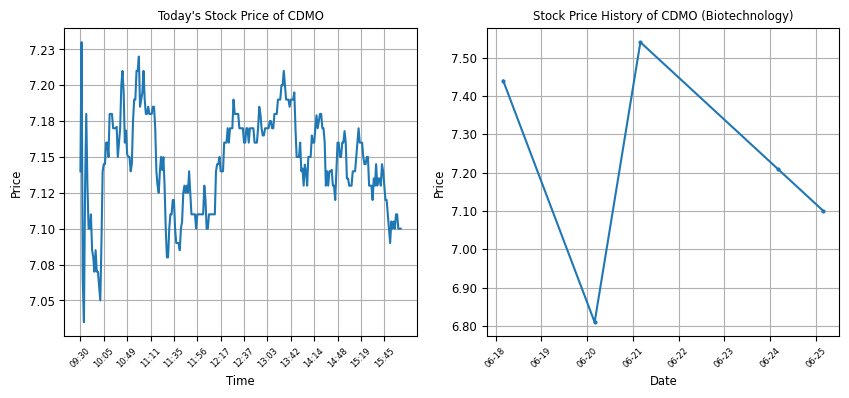

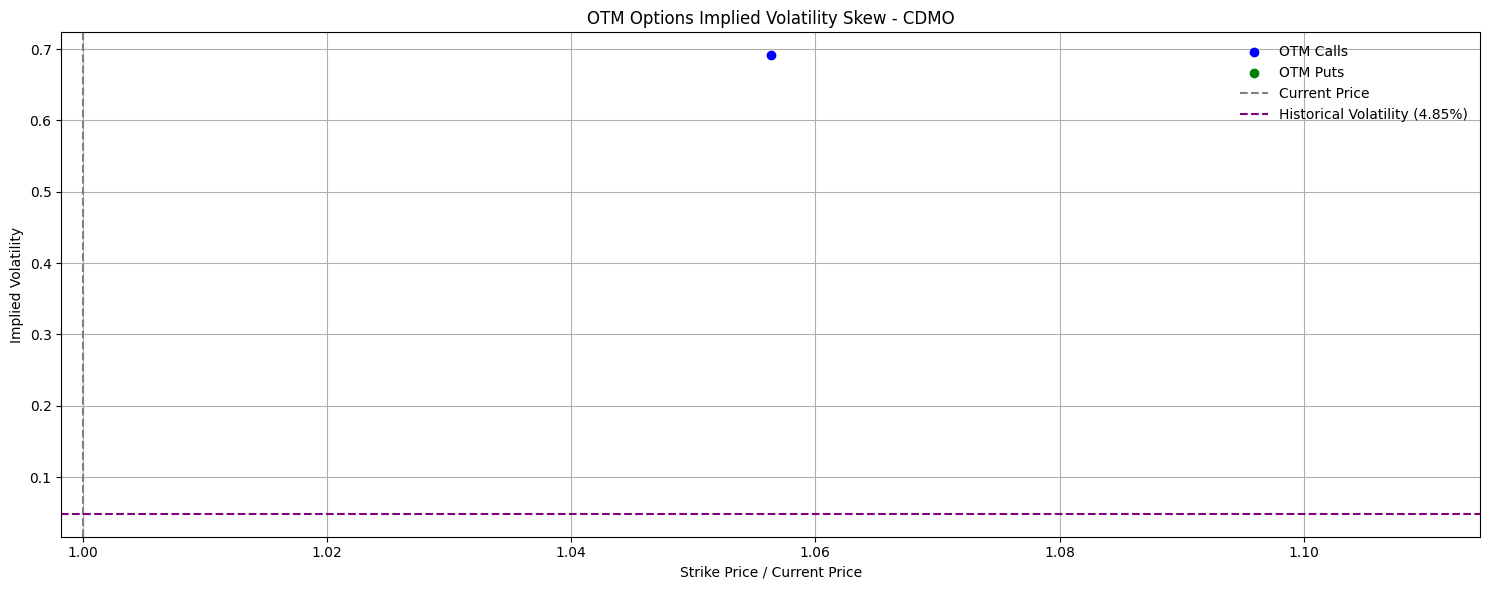

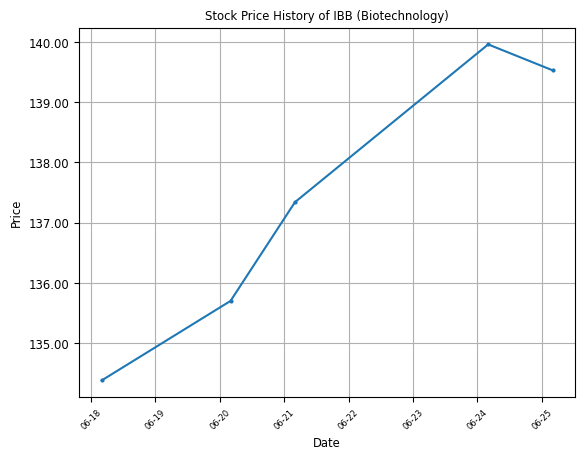

Options data for AIP:
Average IV for Calls: 0.6407913525390626
Average IV for Puts: 0.549483671875
Total Call Volume: 37.0
Total Call open interest: 95
Total Call engagement: 132.0
Total Put Volume: 6.0
Total Put open interest: 70
Total Put engagement: 76.0
Number of ITM Call Options: 0
Number of ITM Put Options: 3
Number of OTM Call Options: 3
Number of OTM Put Options: 0


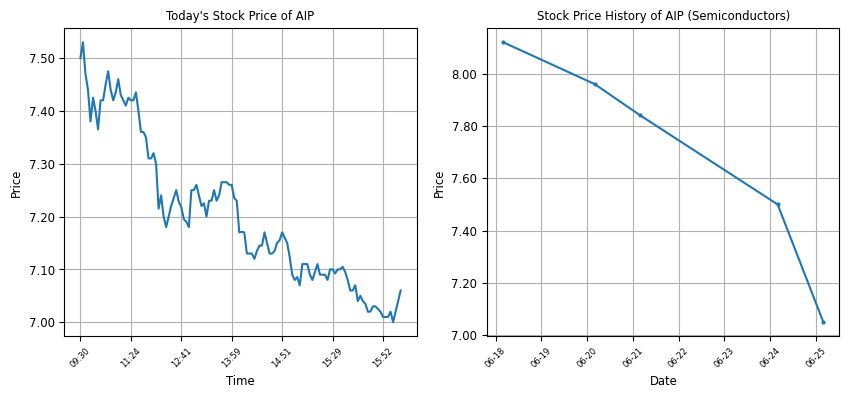

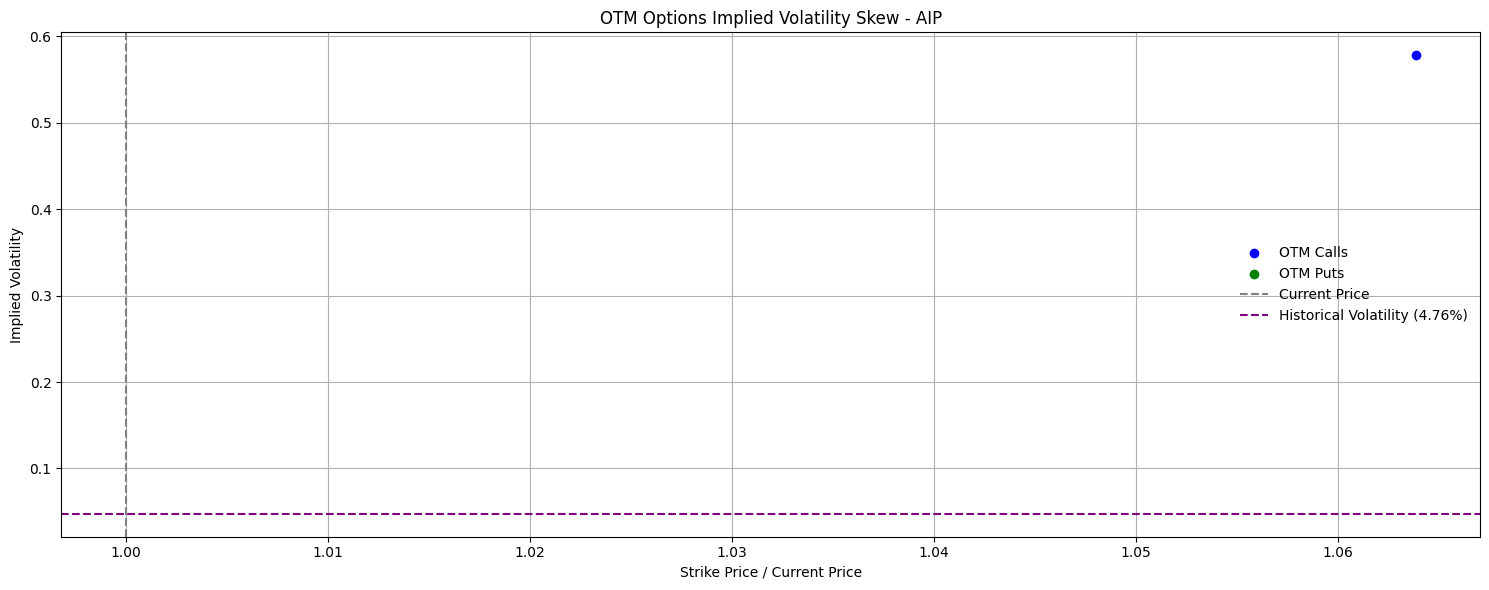

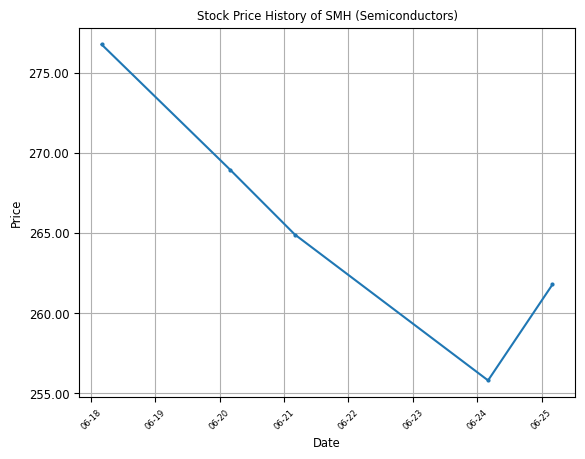

Options data for LFCR:
Average IV for Calls: 0.7539087109375
Average IV for Puts: 0.664065859375
Total Call Volume: 54
Total Call open interest: 227
Total Call engagement: 281
Total Put Volume: 6.0
Total Put open interest: 202.0
Total Put engagement: 208.0
Number of ITM Call Options: 0
Number of ITM Put Options: 2
Number of OTM Call Options: 2
Number of OTM Put Options: 0


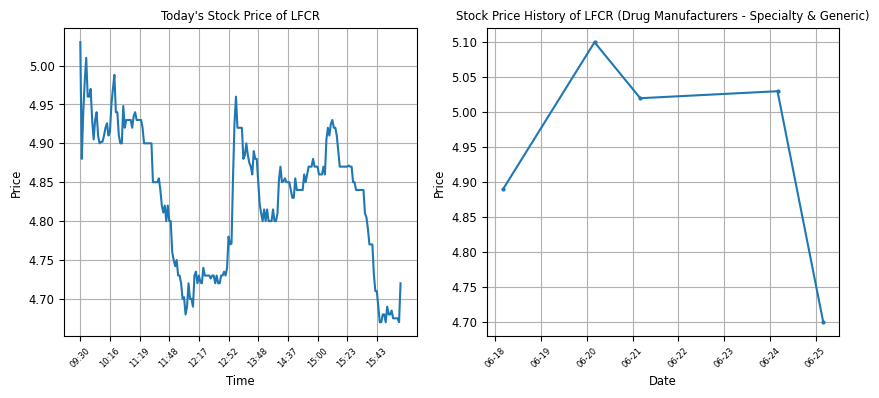

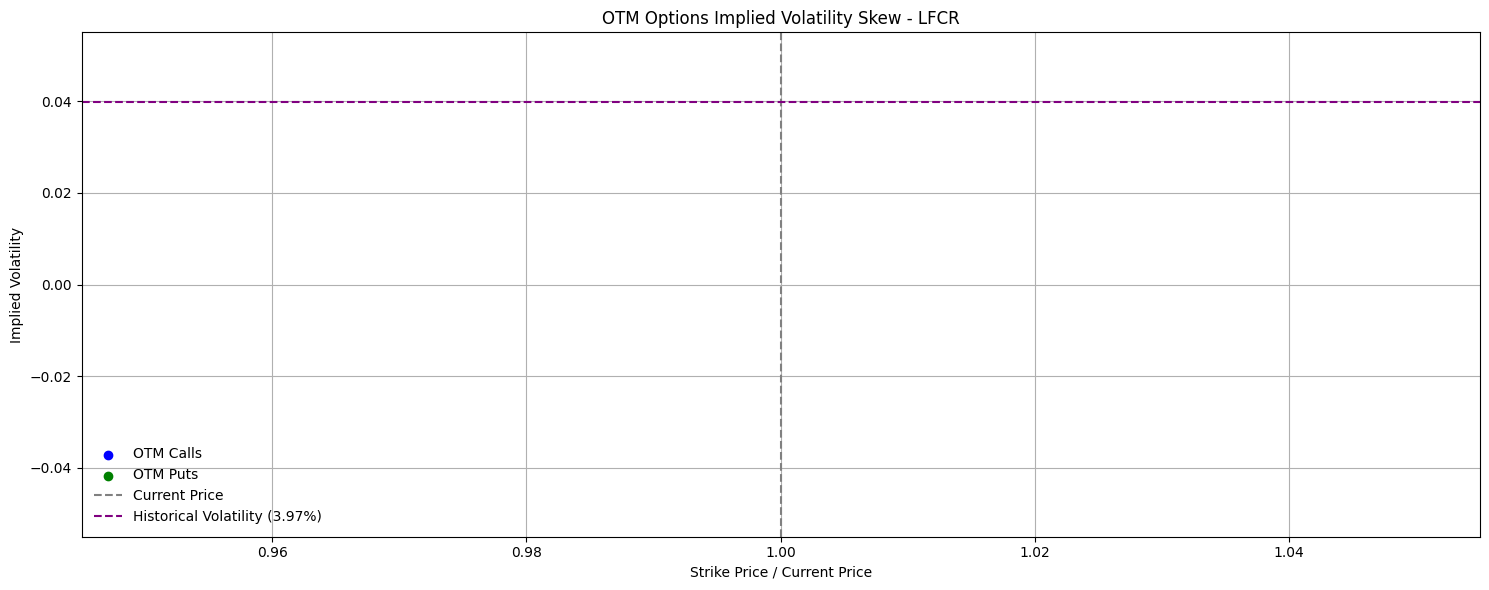

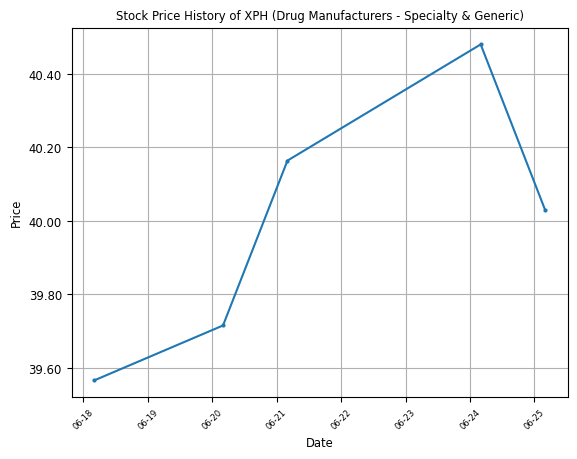

Options data for ADN:
Average IV for Calls: 0.13868048828125
Average IV for Puts: 1.2421943945312501
Total Call Volume: 62
Total Call open interest: 1428
Total Call engagement: 1490
Total Put Volume: 22.0
Total Put open interest: 22.0
Total Put engagement: 44.0
Number of ITM Call Options: 1
Number of ITM Put Options: 1
Number of OTM Call Options: 1
Number of OTM Put Options: 1


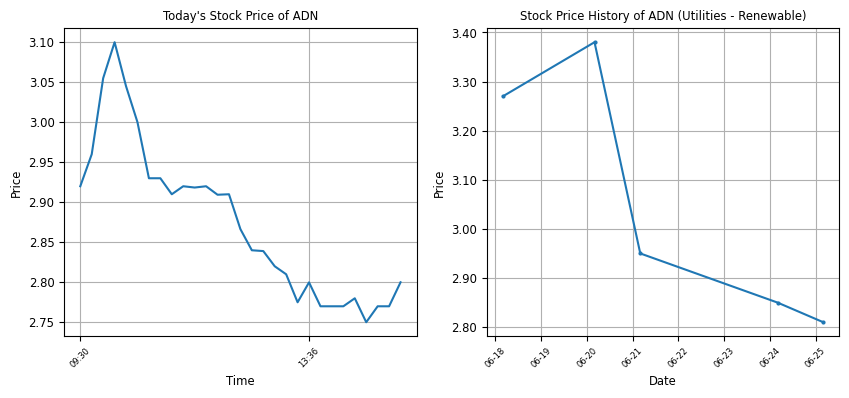

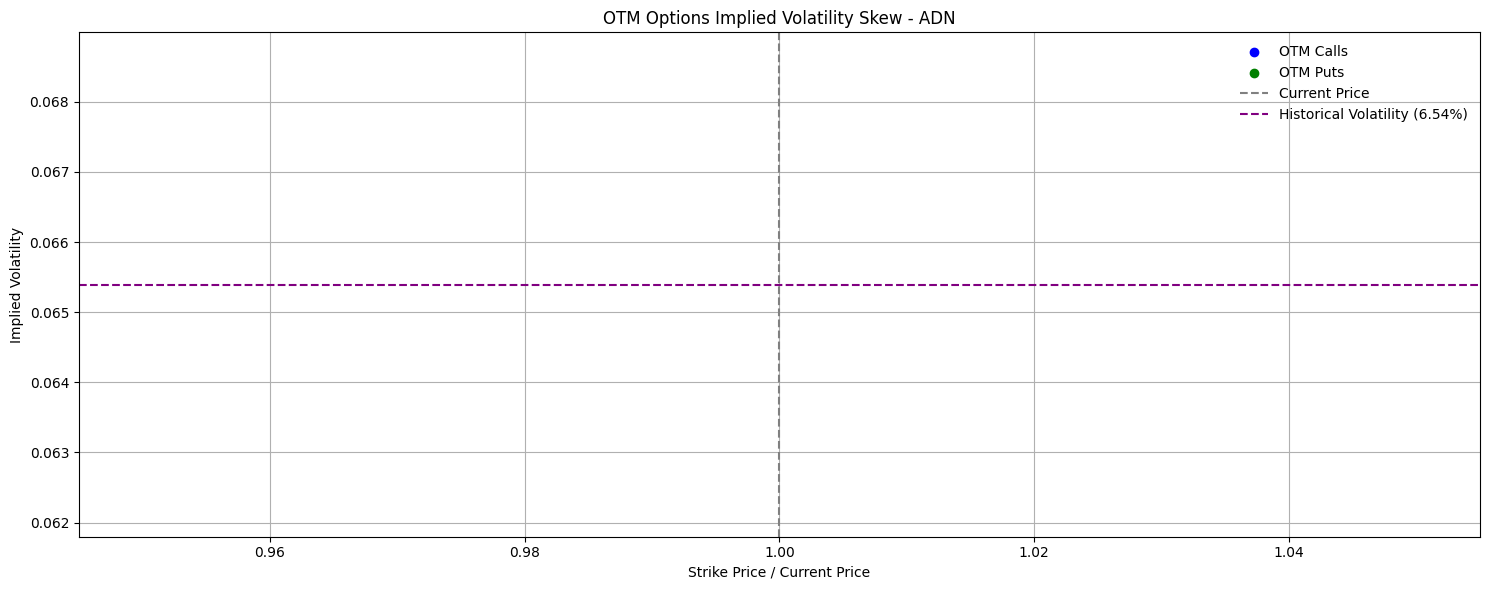

Options data for BTCM:
Average IV for Calls: 1.0833363151041666
Average IV for Puts: 0.8333370703125
Total Call Volume: 73.0
Total Call open interest: 185.0
Total Call engagement: 258.0
Total Put Volume: 5.0
Total Put open interest: 32
Total Put engagement: 37.0
Number of ITM Call Options: 0
Number of ITM Put Options: 3
Number of OTM Call Options: 3
Number of OTM Put Options: 0


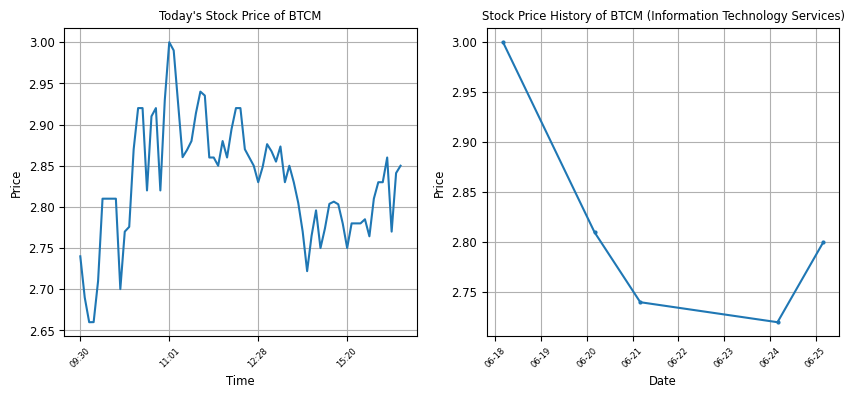

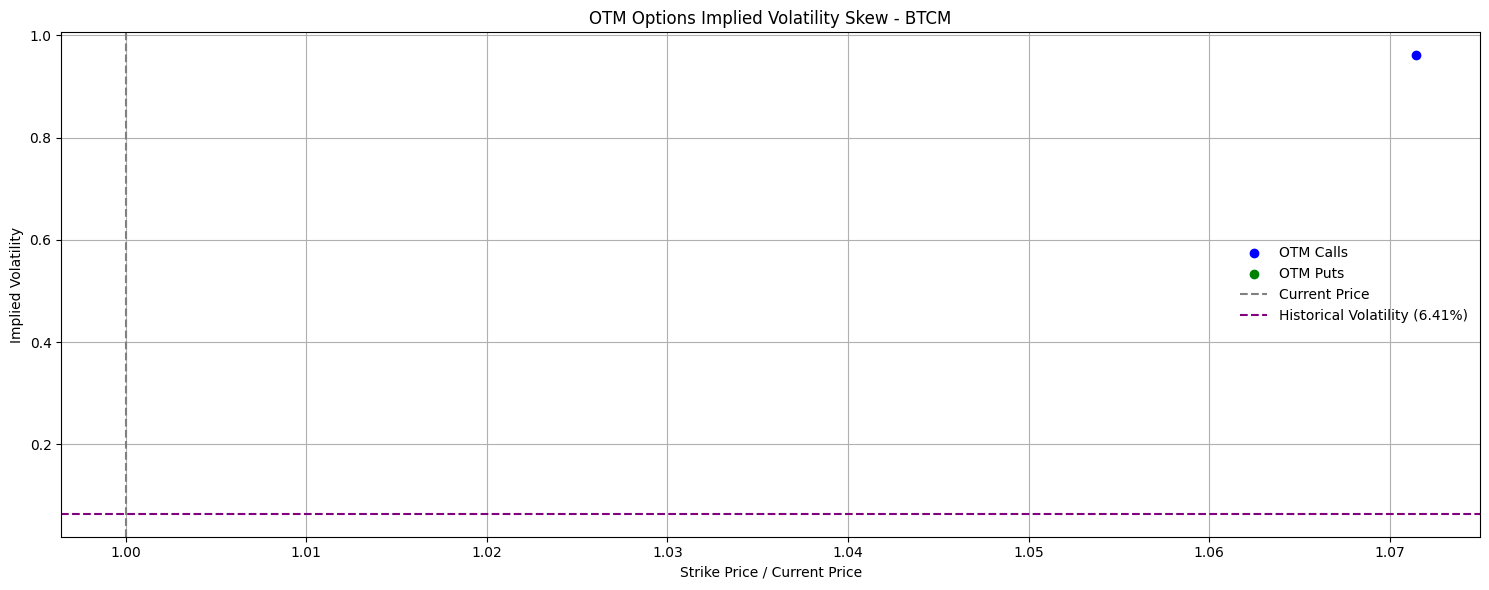

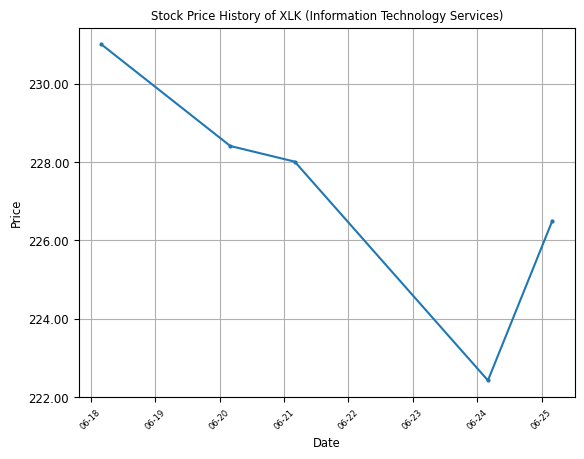

Options data for BYSI:
Average IV for Calls: 1.6523454882812498
Average IV for Puts: 0.44141183593749994
Total Call Volume: 32
Total Call open interest: 1148
Total Call engagement: 1180
Total Put Volume: 5.0
Total Put open interest: 48.0
Total Put engagement: 53.0
Number of ITM Call Options: 0
Number of ITM Put Options: 2
Number of OTM Call Options: 2
Number of OTM Put Options: 0


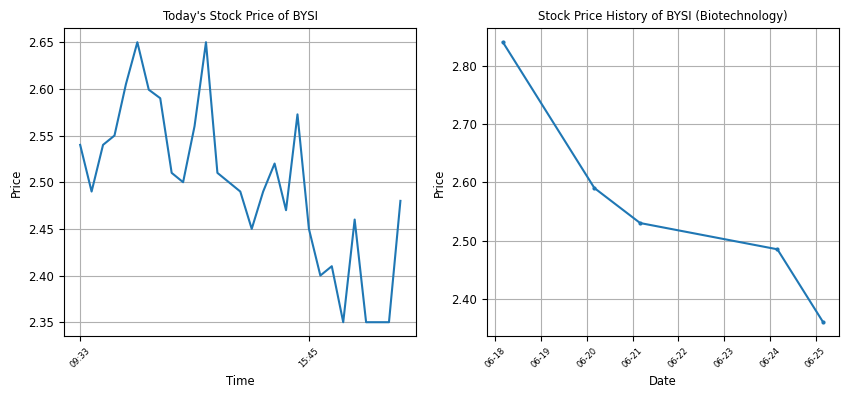

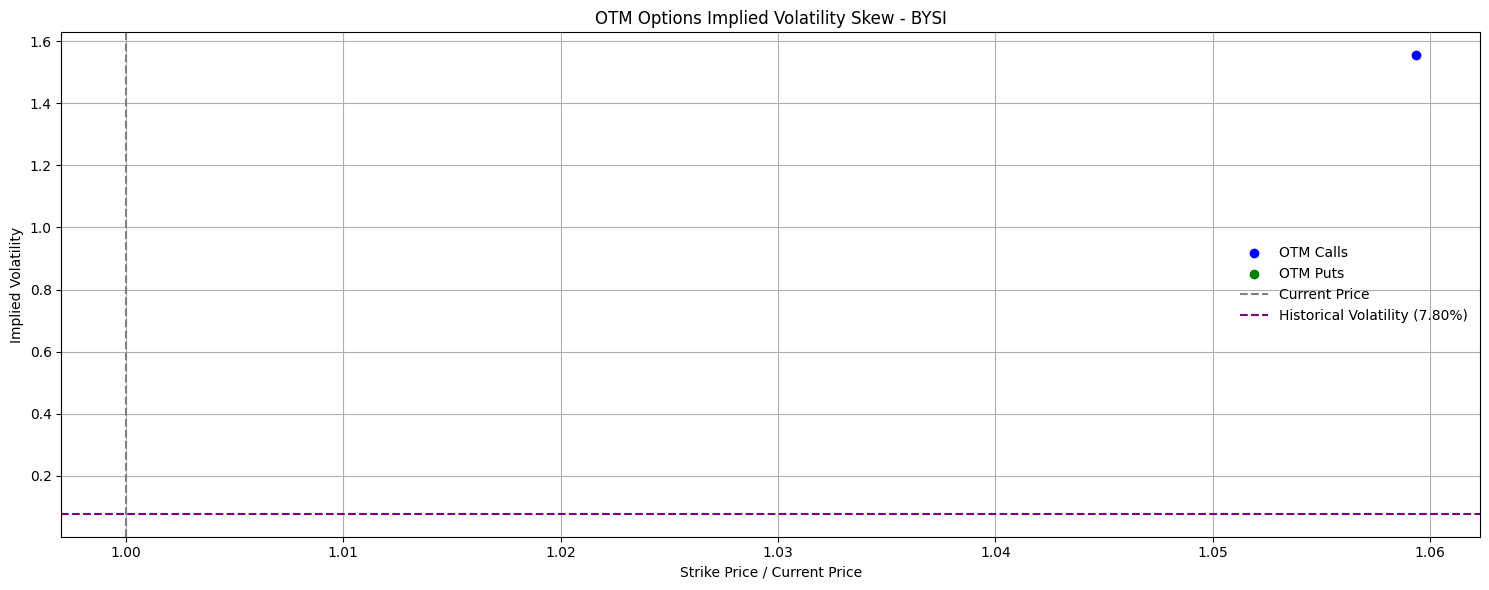

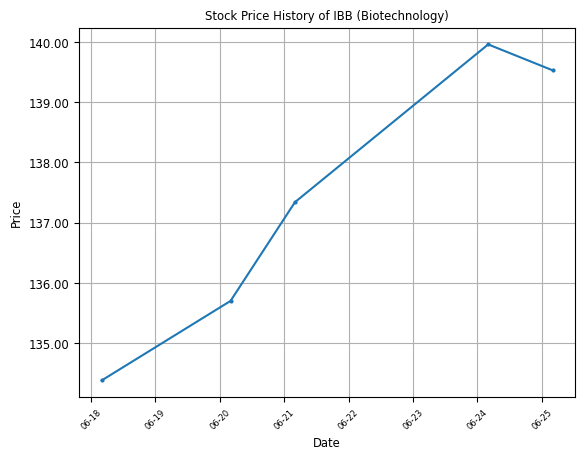

Options data for BB:
Average IV for Calls: 0.9302220205965912
Average IV for Puts: 0.806066094193892
Total Call Volume: 10499.0
Total Call open interest: 43602
Total Call engagement: 54101.0
Total Put Volume: 7261.0
Total Put open interest: 23597
Total Put engagement: 30858.0
Number of ITM Call Options: 11
Number of ITM Put Options: 11
Number of OTM Call Options: 11
Number of OTM Put Options: 11


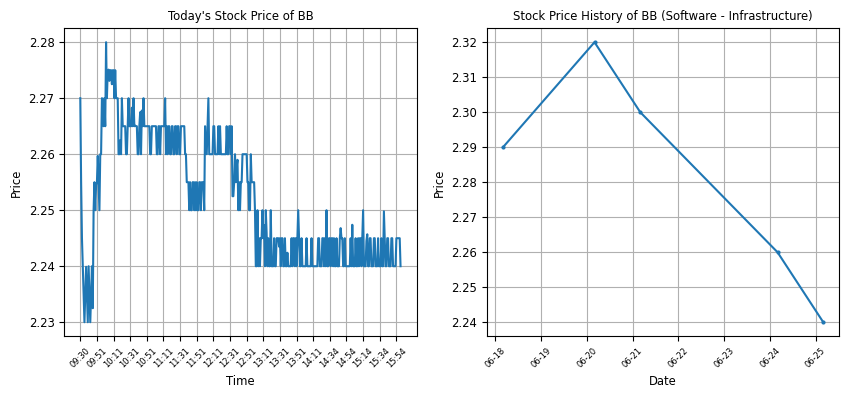

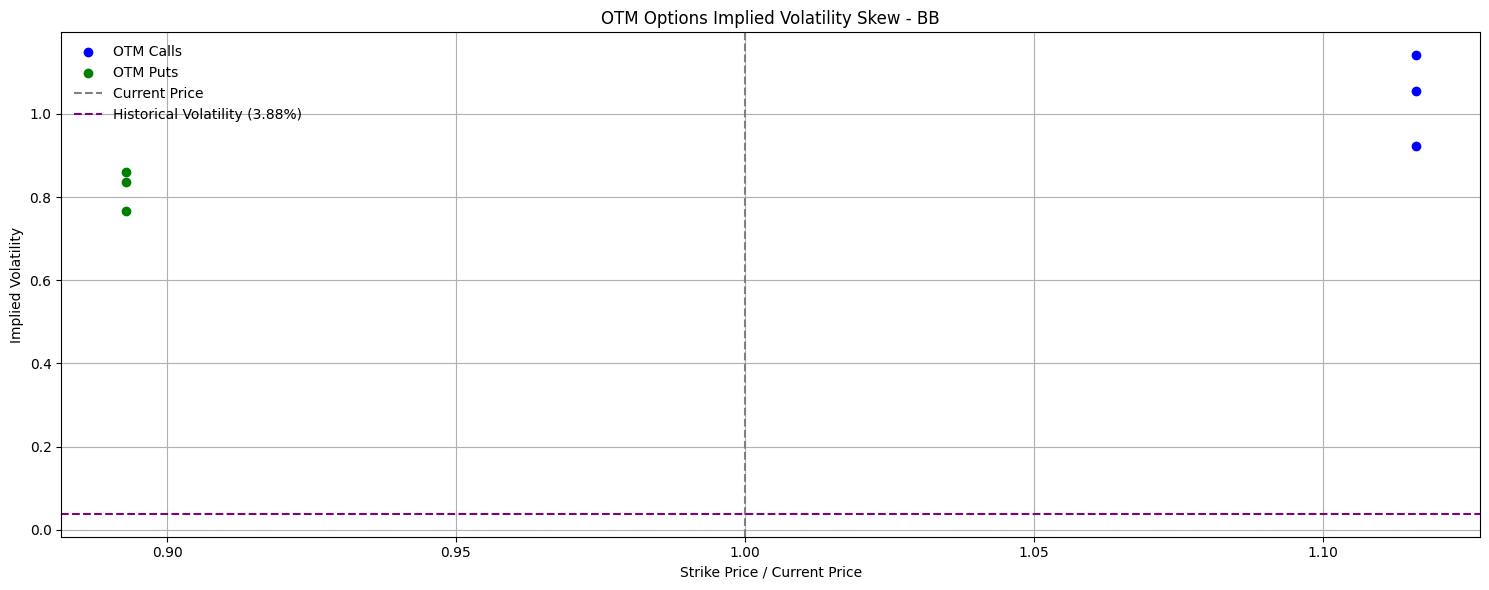

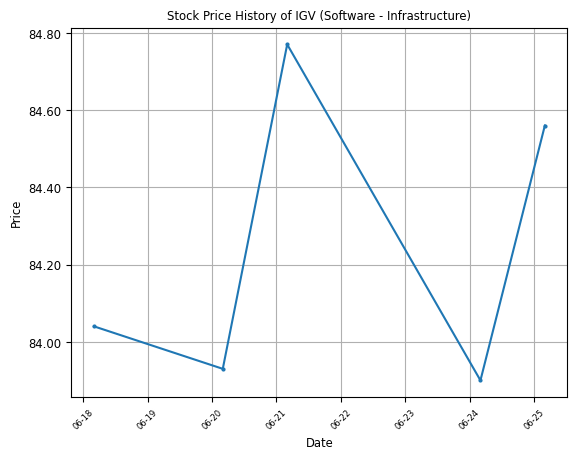

Options data for LAB:
Average IV for Calls: 0.8539087890625
Average IV for Puts: 0.2773509765625
Total Call Volume: 107.0
Total Call open interest: 115
Total Call engagement: 222.0
Total Put Volume: 40.0
Total Put open interest: 140.0
Total Put engagement: 180.0
Number of ITM Call Options: 1
Number of ITM Put Options: 1
Number of OTM Call Options: 4
Number of OTM Put Options: 1


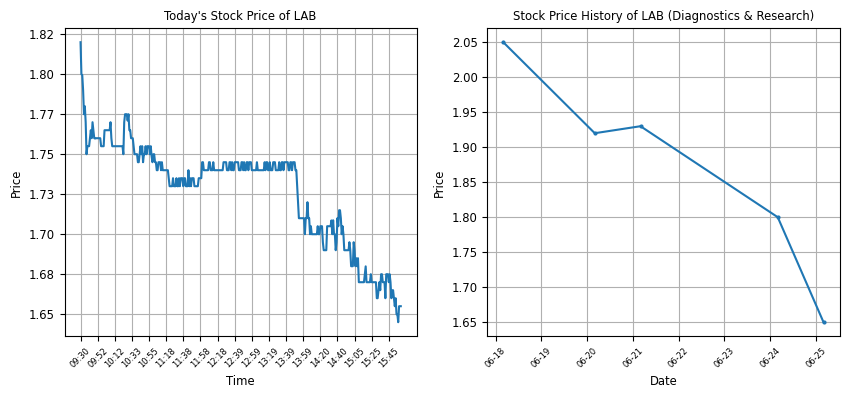

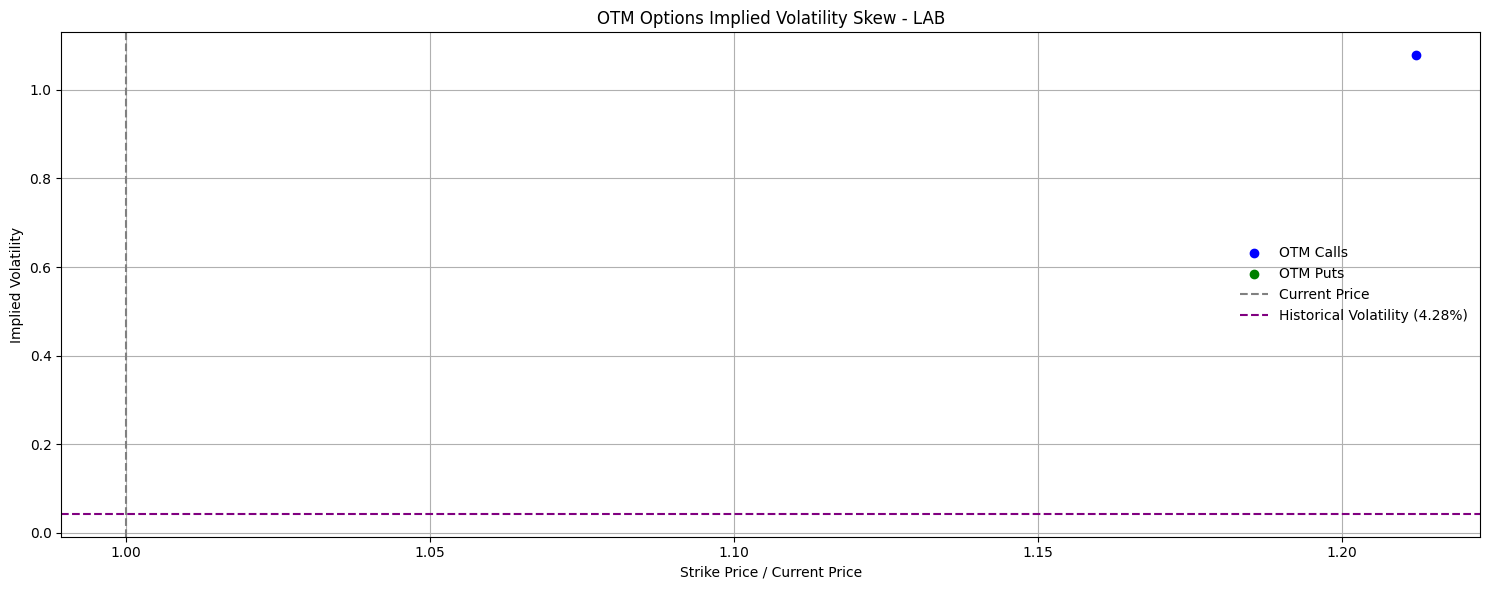

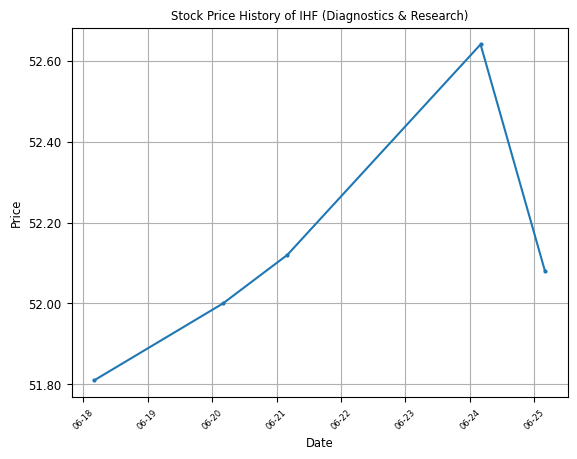

KeyboardInterrupt: 

In [1]:
import setup
from imports import *
from scripts.analyze_stock import *  
from scripts.scrape_url import *
from scripts.plotting_routines import *

# Call the function and store the result
day = '2024-06-25'
date = datetime.strptime(day, '%Y-%m-%d')

# Set the time frame
end_date = date + timedelta(days=7)
start_date = date - timedelta(days=7)

ticker_data_list=[]

# First page
url = 'https://finance.yahoo.com/calendar/earnings/?day=' + day
print(url)
ticker_data_list = process_earnings_table(extract_table(url), ticker_data_list)
    
# Second page
url += '&offset=100&size=100'
print(url)
ticker_data_list = process_earnings_table(extract_table(url), ticker_data_list)

# Pandas Dataframe
ticker_data_sorted = convert_to_dataframe(ticker_data_list)

filtered_tickers = []

# Iterate through the sorted list of tickers
for index, row in ticker_data_sorted.iterrows():
    ticker = row['Symbol']
    
    if ticker in filtered_tickers:
        continue

    # Use the function from utils.py to analyze stock options
    options_metrics = analyze_stock_options(ticker)
    
    if options_metrics['total_itm_calls'] == 0 and options_metrics['total_itm_puts'] == 0:
        continue

    # Get All Analysis
    print_options_data(ticker, options_metrics)

    # Call the plot_stock_history method
    plot_stock_history(ticker, start_date, end_date)

    # IV Skew
    plot_iv_skew_otm_only(options_metrics, end_date, ticker)

    # Sector ETF Time Series
    plot_etf_historical_data(ticker, start_date, end_date)

    # Filtered tickers
    filtered_tickers.append(ticker)
    
del filtered_tickers, ticker_data_list, ticker_data_sorted